### Classification Excercise with Decision tree

#### 1. Use three methods: 
##### i) regression, 
##### ii) regression tree, 
##### iii) model tree 
#### on the weather dataset: https://archive.ics.uci.edu/ml/datasets/SML2010 that we also used in Topic2 Naïve Bayes (chapter 4), and forecast 
#### a) temperature (attribute 5), 
#### b) the amount of precipitation (in attribute 12). 

#### How do the three methods compare (in terms of mean absolute error MAE)?

##### Note: The data from the repository is in .txt rather than .csv format. 
##### You can use: read.table instead of read.csv when importing the file to RStudio 
##### Also install package: rpart.plot

In [2]:
setwd("C:/Users/devops/MachineLearningwithR/Day8-RegressionMethods")  #setting work directory (\ does not work on windows so it is replaced with /)
#options(jupyter.plot_scale=1) # this will set the plot size to its full size
options(jupyter.plot_scale=2) # this will set the plot size to its half size

In [3]:
# Clean the environment and image, if applicable
dev.off()
rm(list = ls())

null device 
          1

In [4]:
#Import csv
weather <- read.table("./data/Weather1.txt", stringsAsFactors = FALSE)
sprintf("Weather data has %d columns and %d rows", ncol(weather), nrow(weather))
(head(weather))
#View(weather)
str(weather)



[1] "Weather data has 24 columns and 2764 rows"

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,⋯,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2
2,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,⋯,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2
3,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,⋯,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2
4,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,⋯,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2
5,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,⋯,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2
6,13/03/2012,13:00,19.6407,19.2773,20.0,218.389,216.011,39.8107,42.0347,81.2427,⋯,36511.70,8694.78,95354.9,752.683,0,0,0,20.1660,45.5467,2


'data.frame':	2764 obs. of  24 variables:
 $ V1 : chr  "13/03/2012" "13/03/2012" "13/03/2012" "13/03/2012" ...
 $ V2 : chr  "11:45" "12:00" "12:15" "12:30" ...
 $ V3 : num  18.2 18.5 18.8 19.1 19.4 ...
 $ V4 : num  17.8 18.1 18.4 18.8 19 ...
 $ V5 : num  0 6.8 17 18 20 20 20 20 20 20 ...
 $ V6 : num  217 220 219 219 218 ...
 $ V7 : num  222 220 219 217 216 ...
 $ V8 : num  39.9 39.9 39.8 39.8 39.8 ...
 $ V9 : num  42.4 42.2 42.2 42.1 42.1 ...
 $ V10: num  81.7 81.7 81.4 81.5 81.5 ...
 $ V11: num  114 114 114 113 113 ...
 $ V12: num  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: num  623 623 623 623 622 ...
 $ V14: num  1.43 1.59 1.89 1.83 2.36 ...
 $ V15: num  9690 11022 13960 18511 26349 ...
 $ V16: num  12604 10787 9670 9648 9208 ...
 $ V17: num  95437 95437 95399 95360 95355 ...
 $ V18: num  759 762 766 766 763 ...
 $ V19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V22: num  18.1 18.4 18.9 19.3 19.7 ...
 $ V23: num  48.4 47.8 47.4 47 

In [16]:
# checking data
install.packages("ggplot2")                                  # Install and load ggplot2
library("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\RtmpUbkXtZ\downloaded_packages



Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




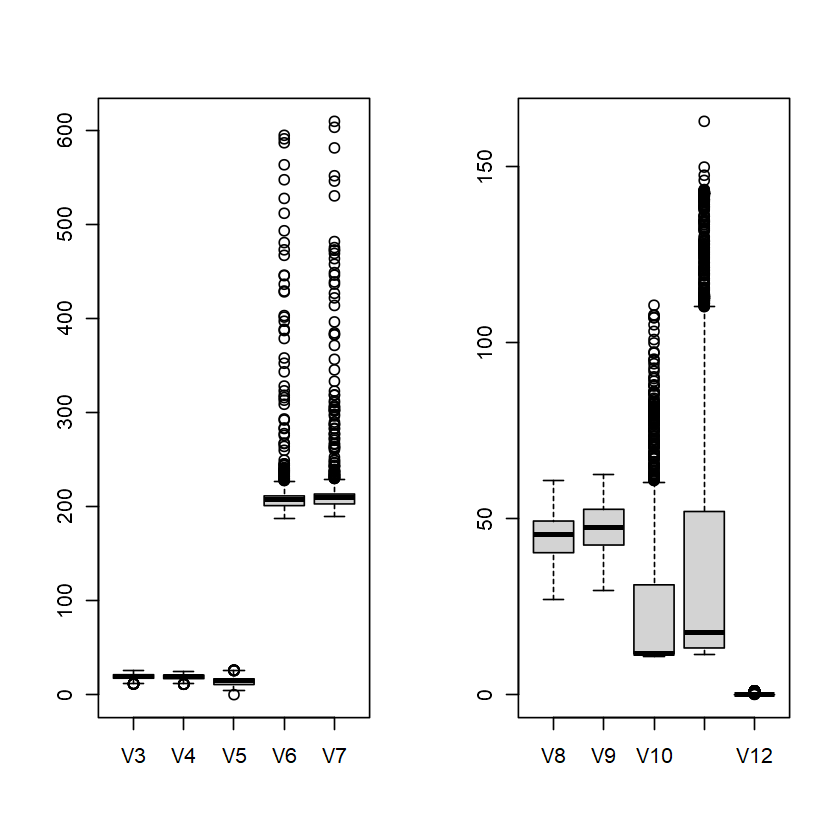

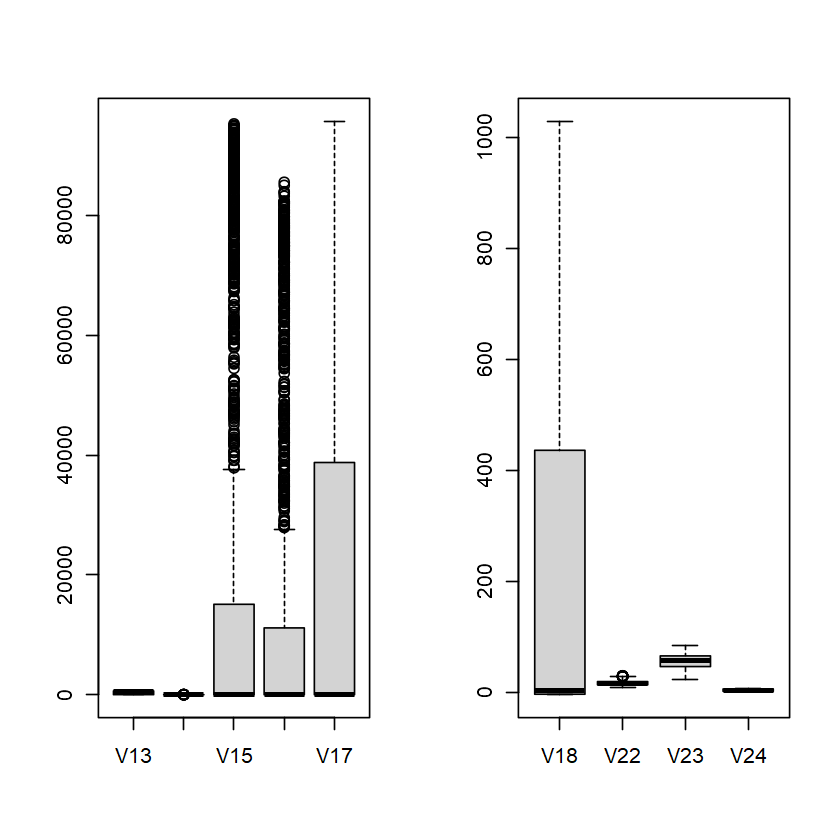

In [22]:
par(mfrow=c(1,2))
options(jupyter.plot_scale=1)
boxplot(weather_new[,c(1,2,3,4,5)])
boxplot(weather_new[,c(6,7,8,9,10)])
boxplot(weather_new[,c(11,12,13,14,15)])
boxplot(weather_new[,c(16,17,18,19)])


In [ ]:
#TODO
featurePlot(x = weather_new[, 1:4], 
            y = wea, 
            plot = "box", 
            ## Pass in options to bwplot() 
            scales = list(y = list(relation="free"),
                          x = list(rot = 90)),  
            layout = c(4,1 ), 
            auto.key = list(columns = 2))

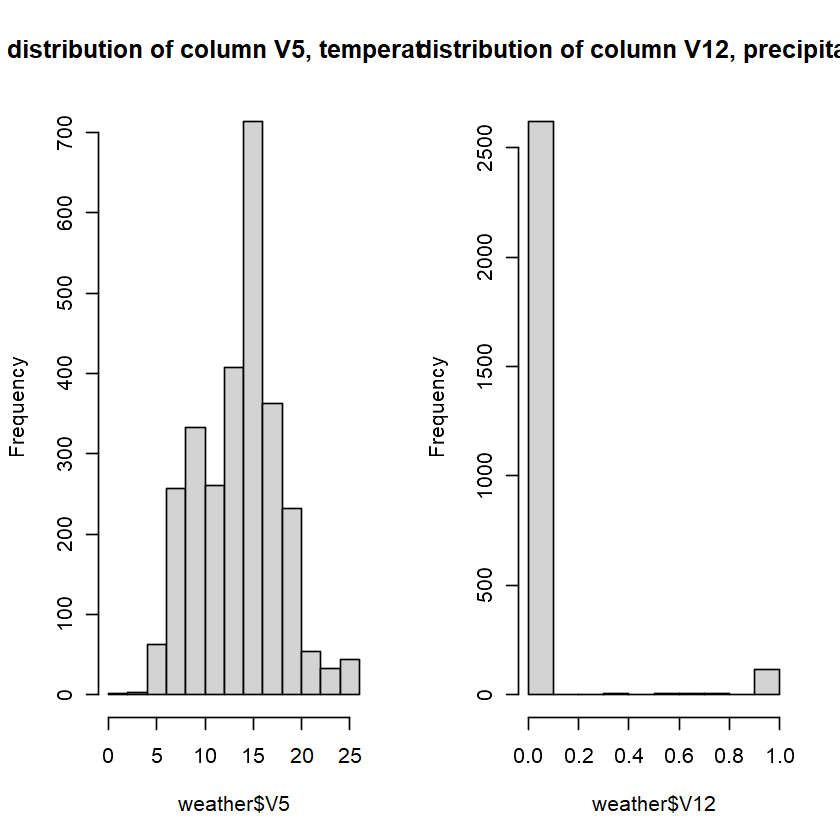

In [6]:
par(mfrow=c(1,2))
hist(weather$V5, main = 'distribution of column V5, temperature')
hist(weather$V12, main = 'distribution of column V12, precipitation') 

In [7]:
# removing col 19,20,21 as they are always 0
weather_new <- weather[, -c(1,2,19,20,21)]
head(weather_new)

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V22,V23,V24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,113.520,0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,18.1150,48.3750,2
2,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,113.605,0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,18.4147,47.8080,2
3,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,113.600,0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,18.8533,47.4320,2
4,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,113.344,0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,19.2907,47.0240,2
5,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,113.034,0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,19.7400,45.4743,2
6,19.6407,19.2773,20.0,218.389,216.011,39.8107,42.0347,81.2427,113.600,0,622.400,2.06333,36511.70,8694.78,95354.9,752.683,20.1660,45.5467,2


In [8]:
install.packages("corrplot")
library(corrplot)        

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\RtmpUbkXtZ\downloaded_packages


corrplot 0.92 loaded



In [9]:
(cor(weather_new))

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V22,V23,V24
V3,1.00000000,9.909408e-01,0.70677665,0.050209763,0.028808713,-0.273087636,-0.41201400,0.02975138,-0.038484269,-0.270242679,0.046682535,0.199828000,0.33310927,-0.28482531,-3.908276e-02,0.08806786,0.85599137,-0.560466639,0.033763447
V4,0.99094082,1.000000e+00,0.72087658,0.061361129,0.056194738,-0.275193226,-0.41790107,0.06926371,0.002253119,-0.262620929,0.068896580,0.220666983,0.33528817,-0.26903413,7.206457e-05,0.12338975,0.86341651,-0.549680635,0.016516791
V5,0.70677665,7.208766e-01,1.00000000,0.098194330,0.079919524,-0.196823662,-0.29887805,0.41892733,0.379802094,-0.093927314,0.388210751,0.536246595,0.47028664,-0.03446977,3.540291e-01,0.48349133,0.87462992,-0.498806496,-0.020279796
V6,0.05020976,6.136113e-02,0.09819433,1.000000000,0.925521836,-0.004697705,-0.02716981,0.25505870,0.214517441,-0.078120310,0.121909689,0.029190171,0.14648913,0.02363265,2.566647e-01,0.22649270,0.09309895,-0.028235363,-0.135281246
V7,0.02880871,5.619474e-02,0.07991952,0.925521836,1.000000000,-0.013242138,-0.02224418,0.24172701,0.196713724,-0.077394825,0.108002364,0.009194373,0.11504601,0.01256511,2.424751e-01,0.20421155,0.06709075,-0.009462159,-0.129085411
V8,-0.27308764,-2.751932e-01,-0.19682366,-0.004697705,-0.013242138,1.000000000,0.93126685,-0.04660015,-0.017653904,-0.081596927,-0.052456455,-0.197537306,-0.10050510,-0.01650250,-5.701872e-02,-0.04523985,-0.18067028,0.696972937,-0.058967833
V9,-0.41201400,-4.179011e-01,-0.29887805,-0.027169812,-0.022244180,0.931266848,1.00000000,-0.11643419,-0.092875511,0.051321764,-0.083594968,-0.153276108,-0.13091961,-0.06738414,-1.334931e-01,-0.12030992,-0.28865727,0.809993059,-0.103301407
V10,0.02975138,6.926371e-02,0.41892733,0.255058703,0.241727006,-0.046600147,-0.11643419,1.00000000,0.948650429,-0.108220408,0.631730093,0.545033587,0.42637519,0.40444367,9.493403e-01,0.94814536,0.37281877,-0.220634691,0.045991218
V11,-0.03848427,2.253119e-03,0.37980209,0.214517441,0.196713724,-0.017653904,-0.09287551,0.94865043,1.000000000,-0.112233766,0.629561698,0.475905647,0.31505959,0.56567878,9.655050e-01,0.93223675,0.30456864,-0.182360154,0.051007504
V12,-0.27024268,-2.626209e-01,-0.09392731,-0.078120310,-0.077394825,-0.081596927,0.05132176,-0.10822041,-0.112233766,1.000000000,-0.005660968,0.239574878,-0.11667354,-0.10572828,-1.370751e-01,-0.13914855,-0.22899718,0.294056424,-0.172599472


In [10]:
install.packages("psych")
library(psych)

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\RtmpUbkXtZ\downloaded_packages


In [11]:
ncol(weather_new)

[1] 19

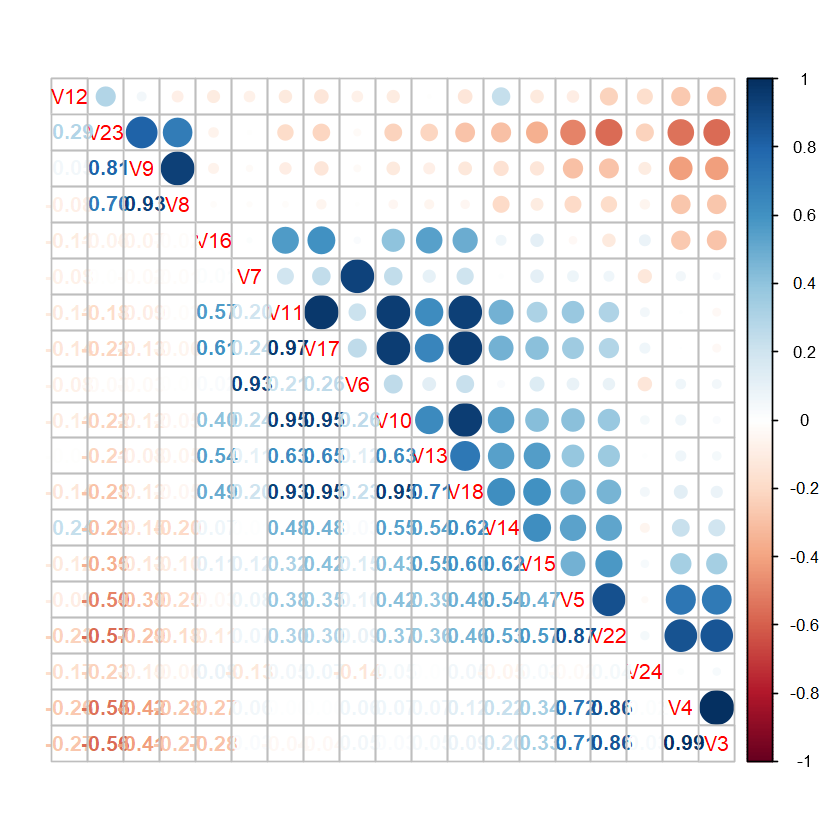

In [12]:

options(jupyter.plot_scale=1)
#corrplot(cor(weather_new))
#corrplot.mixed(cor(weather_new), lower = 'shade', upper = 'pie', order = 'hclust')
corrplot.mixed(cor(weather_new), order = 'AOE')

# corrplot(cor(weather_new), method = 'number')
options(jupyter.plot_scale=2)

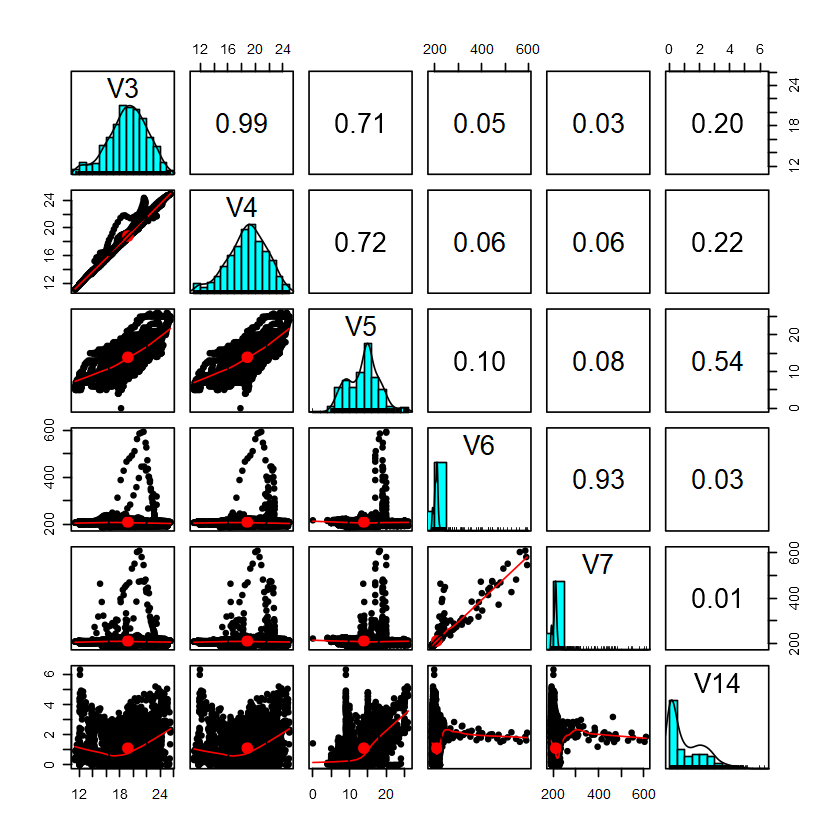

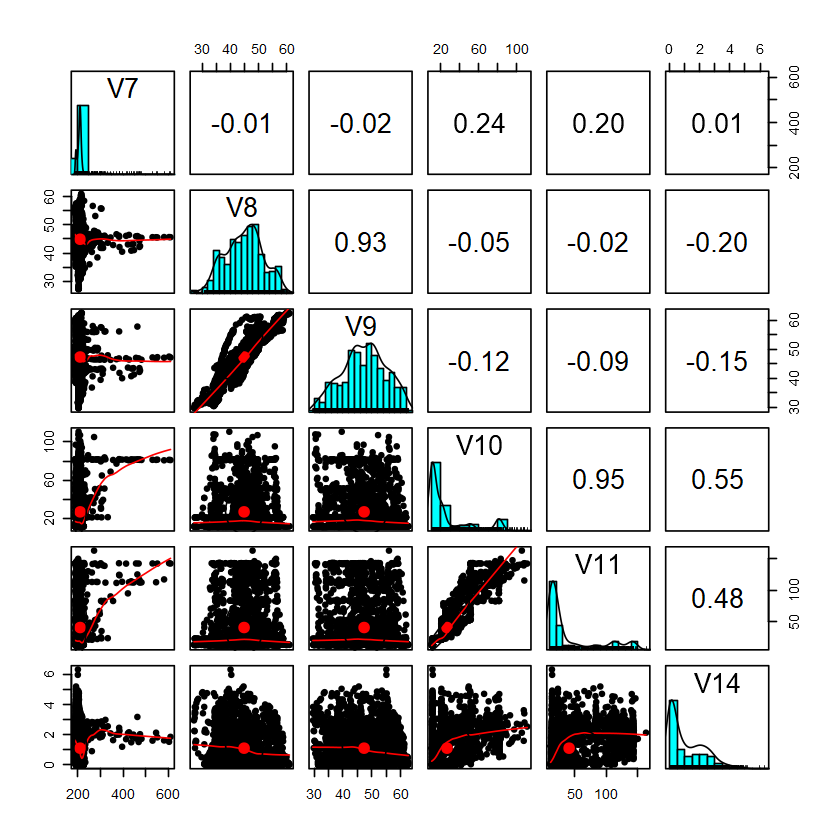

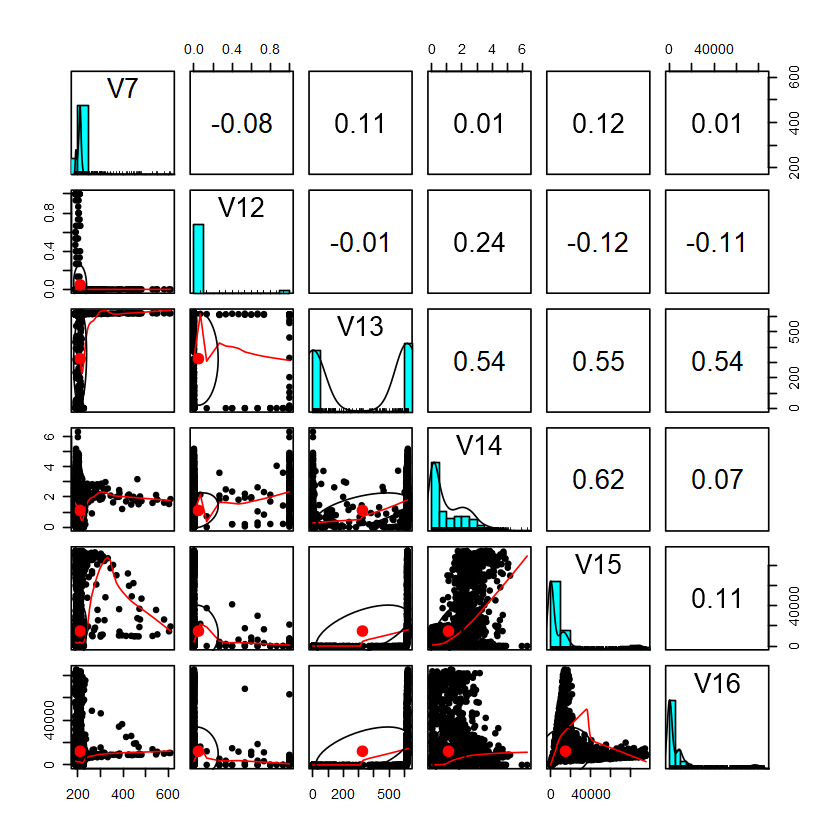

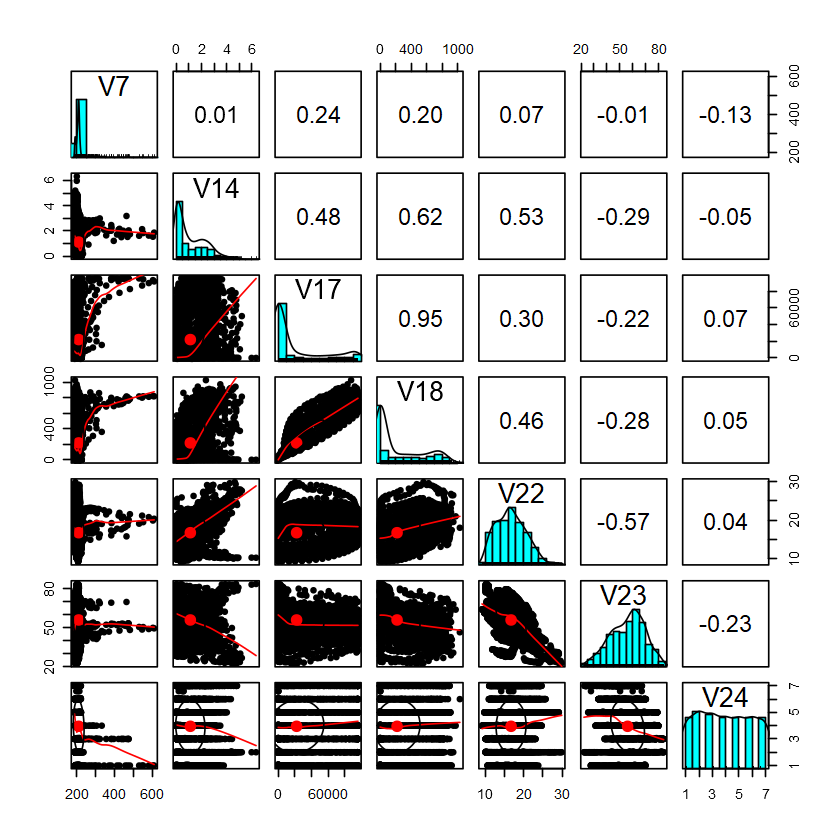

In [13]:
par(mfrow=c(1,2))
options(jupyter.plot_scale=1)
pairs.panels(weather_new[, c(1,2,3,4,5,12)])
pairs.panels(weather_new[, c(5,6,7,8,9,12)])
pairs.panels(weather_new[, c(5,10,11,12,13,14)])
pairs.panels(weather_new[, c(5,12,15,16,17,18,19)])


# In most cases, regression models require character features to be converted into numerical features before they can be used for training.
# This is because regression models are designed to work with numerical data and can't directly handle non-numerical data.

summary(weather)

#### 2. Use the Titanic dataset https://www.kaggle.com/c/titanic/ and decide what decision tree based approach works best for predicting survival of passengers.
#### You will need a Kaggle user, and you can find multiple approaches and inspiration on the subject through the website.